In [1]:
import numpy as np
import pandas as pd
import os
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score

/Users/zhangle/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd() #获取当前工作目录

'/Users/zhangle/AnacondaProjects'

In [3]:
%ls # to view cwd directory contents:

copy_tb.ipynb       fs.ipynb            measle_ARIMA.ipynb  tbrecurrence.ipynb
floatsmoke.ipynb    hiv.ipynb           measles.ipynb       try.ipynb


In [4]:
# 读取
tbrecurrence = pd.read_excel('/Users/zhangle/百度云同步盘/工作/tbRCT/mldata/recurrence.xlsx') 

In [5]:
#查看列 查看所有列
tbrecurrence.columns

Index(['结局复发死亡', '结局复发', 'status1', 'status2', 'time', 'Group', '组别', '单位',
       '姓名', '编号', '文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', '饮酒状况',
       '医疗费用支出类型', '血红蛋白', '血小板', '白细胞', '性别', '年龄', '身高', '体重', 'BMI',
       'INH用量', 'L2/RFP用量', 'mons1', 'mons2', 'mons3', 'mons4', 'mons5',
       'mons6', 'scon_mon', '治疗结局', '复治次数', '登记分类', 'X肺野数', 'X:吸收', '空洞',
       '耐药情况', ' 访第1年', '   第2年', ' 第3年', '第4年', '第5年', ' 第6年', '第7年',
       '     备    注', '化疗方案'],
      dtype='object')

In [6]:
# 改列名 (column name) (rename) 'scon_mon'改为'转阴月份' ; 
#                              '     备    注'改为'备注'。
tbrecurrence.columns=['结局复发死亡', '结局复发', 'status1', 'status2', 'time', 'Group', '组别', '单位',
       '姓名', '编号', '文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', '饮酒状况',
       '医疗费用支出类型', '血红蛋白', '血小板', '白细胞', '性别', '年龄', '身高', '体重', 'BMI',
       'INH用量', 'L2/RFP用量', 'mons1', 'mons2', 'mons3', 'mons4', 'mons5',
       'mons6', '转阴月份', '治疗结局', '复治次数', '登记分类', 'X肺野数', 'X线', '空洞',
       '耐药情况', ' 访第1年', '   第2年', ' 第3年', '第4年', '第5年', ' 第6年', '第7年',
       '备注', '化疗方案']

In [7]:
# 再次查看列名
tbrecurrence.columns

Index(['结局复发死亡', '结局复发', 'status1', 'status2', 'time', 'Group', '组别', '单位',
       '姓名', '编号', '文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', '饮酒状况',
       '医疗费用支出类型', '血红蛋白', '血小板', '白细胞', '性别', '年龄', '身高', '体重', 'BMI',
       'INH用量', 'L2/RFP用量', 'mons1', 'mons2', 'mons3', 'mons4', 'mons5',
       'mons6', '转阴月份', '治疗结局', '复治次数', '登记分类', 'X肺野数', 'X线', '空洞', '耐药情况',
       ' 访第1年', '   第2年', ' 第3年', '第4年', '第5年', ' 第6年', '第7年', '备注', '化疗方案'],
      dtype='object')

In [8]:
# 查看表(DataFrame)
tbrecurrence.head(n=1)

,结局复发死亡,结局复发,status1,status2,time,Group,组别,单位,姓名,编号,...,耐药情况,访第1年,第2年,第3年,第4年,第5年,第6年,第7年,备注,化疗方案
0,未复发,未复发,0,0,7,高剂量组,试验组1,天津,林祥,2051048,...,敏,0,0,0,0,0,18.1,NaN,17.3天津无疫情专报CDC无复发,3H0.3L2ZELfx/5h0.3L2E


In [9]:
tbrecurrence[tbrecurrence.BMI.isnull()]

,结局复发死亡,结局复发,status1,status2,time,Group,组别,单位,姓名,编号,...,耐药情况,访第1年,第2年,第3年,第4年,第5年,第6年,第7年,备注,化疗方案
112,未复发,未复发,0,0,7,长程组,试验组2长,后补,李红蕾,2051002,...,敏,0,0,0,0,0,17.5,NaN,NaN,NaN


In [10]:
# 查看变量 查看某一列 查看列
tbrecurrence.结局复发.head()

0    未复发
1    未复发
2    未复发
3    未复发
4    未复发
Name: 结局复发, dtype: object

In [11]:
# 查看变量 查看某一列 查看列
tbrecurrence['结局复发'].head()

0    未复发
1    未复发
2    未复发
3    未复发
4    未复发
Name: 结局复发, dtype: object

In [12]:
# 查看行 查看记录 查看某一条记录 ix 即 index
tbrecurrence.ix[0].head()

结局复发死亡     未复发
结局复发       未复发
status1      0
status2      0
time         7
Name: 0, dtype: object

In [13]:
# 计数 多少个 查看个数
tbrecurrence['组别'].count() # How many rows the dataset

255

In [14]:
# 计数 多少个 查看个数
tbrecurrence.count().head()

结局复发死亡     255
结局复发       255
status1    255
status2    255
time       255
dtype: int64

In [15]:
# 查看缺失
tbrecurrence.isnull().sum().sort_values(ascending=False).head(10)

备注      163
第7年     157
 第6年     25
血红蛋白      2
血小板       2
白细胞       2
化疗方案      1
文化程度      1
职业        1
婚姻状况      1
dtype: int64

In [16]:
# 缺失值用均值代替
mean_cols = tbrecurrence.mean()
tbrecurrence_new = tbrecurrence.fillna(mean_cols)
# age = df['age'].fillna(value=df.age.mean())

将sex转为0-1变量
    # sex = (df['sex']=='male').astype('int')

#### 查看哪些是 numerical features

In [17]:
numeric_cols = tbrecurrence.columns[tbrecurrence.dtypes != 'object']
numeric_cols

Index(['status1', 'status2', 'time', '编号', '家庭人口数', '血红蛋白', '血小板', '白细胞', '年龄',
       '身高', '体重', 'BMI', '复治次数'],
      dtype='object')

#### 标准化/平滑化 numerical features
(X-X')/sd

In [18]:
numerical_col_means = tbrecurrence.loc[:,numeric_cols].mean()

In [19]:
numerical_col_std = tbrecurrence.loc[:,numeric_cols].std()

In [20]:
t = tbrecurrence.copy()

In [21]:
t.loc[:,numeric_cols] = (t.loc[:,numeric_cols] - numerical_col_means
                        )/numerical_col_std

#### 填补缺失值

In [22]:
# 查看变量分类 分类变量
tbrecurrence['结局复发'].value_counts()
tbrecurrence.loc[tbrecurrence.结局复发=='死亡','结局复发']='未复发'

In [23]:
# 查看变量分类 分类变量
tbrecurrence['文化程度'].value_counts()

中学        137
小学         58
大专本科以上     36
0          13
文盲         10
Name: 文化程度, dtype: int64

In [24]:
# 填补缺失值
clean_文化程度 = tbrecurrence['文化程度'].fillna('Unknown')
clean_文化程度[clean_文化程度 == '0'] = 'Unknown'
clean_文化程度.value_counts()

中学         137
小学          58
大专本科以上      36
Unknown     14
文盲          10
Name: 文化程度, dtype: int64

In [25]:
# 查看变量分类 分类变量
tbrecurrence.Group.value_counts()

高剂量组    73
个体化组    69
长程组     62
对照组     51
Name: Group, dtype: int64

In [26]:
# 复制表
tbrecurrence.copy()[:1]

,结局复发死亡,结局复发,status1,status2,time,Group,组别,单位,姓名,编号,...,耐药情况,访第1年,第2年,第3年,第4年,第5年,第6年,第7年,备注,化疗方案
0,未复发,未复发,0,0,7,高剂量组,试验组1,天津,林祥,2051048,...,敏,0,0,0,0,0,18.1,NaN,17.3天津无疫情专报CDC无复发,3H0.3L2ZELfx/5h0.3L2E


In [27]:
# 重编码变量 空洞
tbrecurrence.空洞.value_counts()
tbrecurrence.空洞.value_counts().sum()
# 重编码 空洞 
tbrecurrence.loc[tbrecurrence.空洞=='33个 1','空洞']=1
tbrecurrence.loc[tbrecurrence.空洞=='洞  0','空洞']=0
tbrecurrence.loc[tbrecurrence.空洞=='22  0','空洞']=0

In [28]:
# 查看 耐药情况 分类
tbrecurrence.耐药情况.value_counts()
# 查看 耐药情况为‘耐’的这条原始记录
tbrr = pd.read_excel('/Users/zhangle/百度云同步盘/工作/tbRCT/mldata/recurrence未删除var.xlsx')
tbrr[tbrr.耐药情况=='耐']
tbrr.ix[245,:5]

组别          对照组
单位           遵义
姓名          郭忠强
编号      2201033
文化程度          0
Name: 245, dtype: object

In [29]:
# 重编码耐药情况 缺失值填补
tbrecurrence.耐药情况.fillna('Unknown')
tbrecurrence.loc[tbrecurrence.耐药情况 == '耐','耐药情况'] = 'Unknown'
tbrecurrence.耐药情况.value_counts()

敏          151
单耐          48
多耐          42
Unknown     14
Name: 耐药情况, dtype: int64

In [30]:
tbrecurrence.化疗方案.describe()

count             254
unique            194
top       2HRZES/6HRE
freq               15
Name: 化疗方案, dtype: object

In [31]:
tbrecurrence.loc[tbrecurrence.X肺野数 == '无X','X肺野数'] = 'Unknown'
tbrecurrence.loc[tbrecurrence.空洞 == '无X','空洞'] = 'Unknown'

In [32]:
# 新建表 筛选变量 排序变量名 变量顺序 reindex(columns=[])
tbr = tbrecurrence.reindex(columns=['结局复发','Group','文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', 
                                    '饮酒状况','医疗费用支出类型', '血红蛋白','性别', '年龄','BMI','转阴月份','复治次数', 
                                    '登记分类','X肺野数', 'X线', '空洞', '耐药情况','化疗方案','备注'])
tbr.count()

结局复发        255
Group       255
文化程度        254
职业          254
婚姻状况        254
户籍类型        254
家庭人口数       254
吸烟状况        254
饮酒状况        254
医疗费用支出类型    254
血红蛋白        253
性别          255
年龄          255
BMI         254
转阴月份        255
复治次数        254
登记分类        254
X肺野数        254
X线          254
空洞          254
耐药情况        255
化疗方案        254
备注           92
dtype: int64

In [33]:
# 删除变量 obj.drop(['','',''], axis=1)
tbr = tbr.drop(['备注','化疗方案'], axis=1)
tbr[:3]

,结局复发,Group,文化程度,职业,婚姻状况,户籍类型,家庭人口数,吸烟状况,饮酒状况,医疗费用支出类型,...,性别,年龄,BMI,转阴月份,复治次数,登记分类,X肺野数,X线,空洞,耐药情况
0,未复发,高剂量组,大专本科以上,待业下岗人员,未婚,本地户籍,3.0,过去抽现在不抽,过去喝现在不喝,自费,...,男,24,19.4,1,1.0,复发,5,吸收,1,敏
1,未复发,高剂量组,中学,外来务工人员,未婚,非本地12mo以上,4.0,从来不,从来不,自费,...,女,20,20.4,1,1.0,复发,4,吸收,1,敏
2,未复发,高剂量组,中学,其它,已婚,本地户籍,3.0,现在抽,从来不,自费,...,男,52,18.1,1,1.0,复发,4,吸收,0,敏


In [34]:
# 缺失值处理
# 将所有列的空值 填补为 Unknown
columns=['结局复发','Group','文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', '饮酒状况',
       '医疗费用支出类型', '血红蛋白','性别', '年龄','BMI','转阴月份','复治次数', '登记分类','X肺野数', 'X线', '空洞', '耐药情况']
for c in columns:
    tbr[c] = tbr[c].fillna('Unknown')

In [35]:
# 缺失值处理
# 将所有分类变量的 0值 填补为 Unknown
columns = ['文化程度', '职业', '婚姻状况', '户籍类型', '吸烟状况', '饮酒状况','医疗费用支出类型', '性别','BMI','转阴月份','登记分类',
           'X肺野数', 'X线', '空洞', '耐药情况']
for col in columns:
    tbr.loc[tbr[col]=='0',col]='Unknown'

In [36]:
# 缺失值处理
# 将所有分类变量的 0值 替换为 Unknown
for col in columns:
    tbr[col]=tbr[col].replace('0','Unknown')

In [37]:
tbr[tbr.BMI=='Unknown']

,结局复发,Group,文化程度,职业,婚姻状况,户籍类型,家庭人口数,吸烟状况,饮酒状况,医疗费用支出类型,...,性别,年龄,BMI,转阴月份,复治次数,登记分类,X肺野数,X线,空洞,耐药情况
112,未复发,长程组,小学,外来务工人员,其它,非本地12mo以上,4,过去抽现在不抽,过去喝现在不喝,自费,...,女,21,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,敏


In [38]:
# 啥看 Unknown多的index行
tbr[tbr.户籍类型=='Unknown']

,结局复发,Group,文化程度,职业,婚姻状况,户籍类型,家庭人口数,吸烟状况,饮酒状况,医疗费用支出类型,...,性别,年龄,BMI,转阴月份,复治次数,登记分类,X肺野数,X线,空洞,耐药情况
122,未复发,长程组,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,男,44,23.9,Unknown,1,复发,3,吸收,0,敏


In [39]:
tbr.Group.count()

255

In [40]:
# 删除 第 112 和 122行
tbr = tbr.drop([112,122],axis=0)

In [41]:
tbr.Group.count()

253

In [42]:
# 删除列 del
# 删除列 del tbr['文化程度', '职业', '婚姻状况', '户籍类型']

In [43]:
# 年龄 离散化 面元划分 Discretization and binning 
pd.cut(tbr.年龄,[0,30,40,50,77],labels=['0-30','30-40','40-50','50-']).value_counts()

0-30     71
50-      63
40-50    60
30-40    59
Name: 年龄, dtype: int64

In [44]:
# 离散化 年龄 Discretization and binning 
tbr['Age'] = pd.cut(tbr.年龄,[0,30,40,50,77],labels=['0-30','30-40','40-50','50-'])

In [45]:
tbr.家庭人口数.value_counts()

3.0    83
4.0    62
5.0    38
2.0    28
0.0    14
1.0    11
7.0     9
6.0     7
8.0     1
Name: 家庭人口数, dtype: int64

In [46]:
# 数据透视表
pd.pivot_table(tbr,index='家庭人口数',columns='结局复发',values='年龄',aggfunc='count')

结局复发,复发,未复发
家庭人口数,,
0.0,3.0,11.0
1.0,1.0,10.0
2.0,1.0,27.0
3.0,6.0,77.0
4.0,3.0,59.0
5.0,1.0,37.0
6.0,NaN,7.0
7.0,1.0,8.0
8.0,NaN,1.0


In [47]:
# crosstab crosstable with row percentages 行百分比 列联表
d = pd.crosstab(tbr.家庭人口数, tbr.结局复发).apply(lambda r: r/r.sum(), axis=1)

In [48]:
d.复发.plot(kind='bar', rot=0)

In [49]:
# 文化程度 重新分类
tbr.文化程度.value_counts()
tbr.文化程度 = tbr.文化程度.replace({'文盲':'小学及以下','小学':'小学及以下'})

In [50]:
# 职业 重新分类
tbr.职业 = tbr.职业.replace({'国家机关及事业单位工作者':'其它',
                         '教育工作者':'其它',
                         '医疗卫生人员':'其它',
                        '离退休人员':'其它',
                        'Unknown':'其它',
                        '学生':'其它',
                        '交通运输业人员':'其它',
                        })

In [51]:
# 婚姻状况 重新分类
tbr.婚姻状况 = tbr.婚姻状况.replace('其它','Unknown')

In [52]:
# 户籍类型 重新分类
tbr.户籍类型 = tbr.户籍类型.replace({'非本地0-3mo':'非本地一年内',
                            '非本地4-6mo':'非本地一年内',
                            '非本地6-12mo':'非本地一年内',
                            '非本地12mo以上':'非本地一年以上'})

In [53]:
# 医疗费用支出类型 重新分类
tbr.医疗费用支出类型 = tbr.医疗费用支出类型.replace('其它','Unknown')

In [54]:
# 离散化 血红蛋白 Discretization and binning 
tbr[tbr.血红蛋白 == 'Unknown']
tbr.ix[166]
tbr.loc[tbr.血红蛋白 == 'Unknown','血红蛋白']=133
tbr.血红蛋白.astype(float).describe()
tbr.血红蛋白.astype(float).sort_values()[:3]

128    0.0
47     0.0
214    0.0
Name: 血红蛋白, dtype: float64

In [55]:
# 离散化 血红蛋白 Discretization and binning 
tbr['HGB'] = pd.cut(tbr.血红蛋白,[-1,13,110,160,178],labels=['Unknown','87-110','110-160','160-'])
tbr['HGB'].value_counts()

110-160    192
87-110      34
Unknown     18
160-         9
Name: HGB, dtype: int64

In [56]:
tbr[['HGB','血红蛋白']].sort_values(by='血红蛋白')[:2]

,HGB,血红蛋白
128,Unknown,0
47,Unknown,0


In [57]:
# 离散化 BMI
tbr.BMI = pd.cut(tbr.BMI, [0,18.5,23,29.1],right = False, labels=['0-18.5','18.5-23','23-29']) 

In [58]:
tbr.BMI.value_counts()

18.5-23    149
0-18.5      73
23-29       31
Name: BMI, dtype: int64

In [59]:
# 阴转月份 重新分类
tbr.转阴月份.value_counts()
tbr['neg_conv_mo'] = tbr.转阴月份.replace({3:'>=3',4:'>=3',5:'>=3',6:'>=3',0:'1',1:'1'})
tbr['neg_conv_mo'].value_counts()

1          130
Unknown     71
>=3         29
2           23
Name: neg_conv_mo, dtype: int64

In [60]:
tbr.复治次数.value_counts()
tbr.复治次数 = tbr.复治次数.replace({3:'大于等于2',2:'大于等于2',1:'1'})

In [61]:
tbr.X肺野数.value_counts(sort=False)

1          21
2          73
3          47
4          50
5          26
6          34
Unknown     2
Name: X肺野数, dtype: int64

In [62]:
tbr.columns

Index(['结局复发', 'Group', '文化程度', '职业', '婚姻状况', '户籍类型', '家庭人口数', '吸烟状况', '饮酒状况',
       '医疗费用支出类型', '血红蛋白', '性别', '年龄', 'BMI', '转阴月份', '复治次数', '登记分类', 'X肺野数',
       'X线', '空洞', '耐药情况', 'Age', 'HGB', 'neg_conv_mo'],
      dtype='object')

In [63]:
pd.crosstab(tbr.HGB, tbr.结局复发, margins=True).sort_values(by='复发')

结局复发,复发,未复发,All
HGB,,,
160-,1,8,9
Unknown,2,16,18
87-110,3,31,34
110-160,10,182,192
All,16,237,253


In [64]:
pd.crosstab(tbr.HGB, tbr.结局复发).apply(lambda r: r/r.sum(), axis=1).sort_values(by='复发')

结局复发,复发,未复发
HGB,,
110-160,0.052083,0.947917
87-110,0.088235,0.911765
Unknown,0.111111,0.888889
160-,0.111111,0.888889


In [65]:
os.getcwd()

'/Users/zhangle/AnacondaProjects'

In [66]:
tbr.to_excel('/Users/zhangle/百度云同步盘/工作/tbRCT/tbr.xlsx')

In [67]:
tb=pd.read_excel('/Users/zhangle/百度云同步盘/工作/tbRCT/tbr.xlsx')

In [70]:
tbr.to_csv('/Users/zhangle/百度云同步盘/工作/tbRCT/tbr.csv')

# XGBoost

In [65]:
# 选取 过滤 subset
# 把 X y 分开
X = tbr.ix[:,'Group':'neg_conv_mo']
Y = tbr.ix[:,'结局复发']
y = (Y =='复发').astype(int)
# X = X.drop(['家庭人口数','血红蛋白','年龄','转阴月份','neg_conv_mo','X肺野数','X线'], axis=1)
X = X.drop(['血红蛋白','年龄','转阴月份'], axis=1)

In [66]:
y.sum(), X.shape

(16, (253, 20))

In [67]:
for c in ['Group', '文化程度', '职业', '婚姻状况', '户籍类型', '吸烟状况', '饮酒状况', '医疗费用支出类型', '性别',
       'BMI', '复治次数', '登记分类', '空洞', '耐药情况', 'Age', 'HGB', '家庭人口数','neg_conv_mo','X肺野数','X线']:
  X[c] = X[c].astype(str)

In [68]:
# 所有变量 都变成 哑变量
X = pd.get_dummies(X)

In [69]:
# 切分训练集和数据集
# /换行
test_size = 0.25
X_train, X_test, y_train, y_test = model_selection.train_test_split\
(X,y,test_size=test_size,random_state=42)

In [70]:
# 查看 DataFrame X_train X_test
X_train.shape, X_test.shape

((189, 82), (64, 82))

In [71]:
#训练模型
model = xgboost.XGBClassifier(min_child_weight= 10, subsample=0.8, colsample_bytree = 0.8, 
                              max_delta_step= 10, scale_pos_weight =1, max_depth=4, 
                              objective = 'binary:logistic', learning_rate=0.01,
                              n_estimators=500, reg_alpha=0.005)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=10, max_depth=4,
       min_child_weight=10, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0.005, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

#### XGBoost 调参
    # base_score: the initial prediction score of all instances, global bias
    # colsample_bylevel: 决定每次节点划分时子样例的比例。通常不使用，因为subsample和colsample_bytree已经可以起到相同的作用了
    # colsample_bytree: 在建立树时对特征随机采样的比例, 在建立树时对特征随机采样的比例。缺省值为1
    # gamma: 模型在默认情况下，对于一个节点的划分只有在其loss function得到结果大于0的情况下才进行，而gamma给定了所需的最低loss function的值。gamma值使得算法更conservation，且其值依赖于loss function，在模型中应该进行调参。
    # learning_rate
    # max_delta_step: 通常不需要设置这个值，但在使用logistics 回归时，若类别极度不平衡，调高该参数可能有效果Set it to value of 1-10
    # max_depth: 树的最大深度，树的深度越大，则对数据的拟合程度越高过拟合程度也越高。即该参数也是控制过拟合，建议通过交叉验证（xgb.cv)进行调参，通常取值3-10
    # min_child_weight: 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight，则拆分过程结束。在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数。该成熟越大算法越conservative。即调大这个参数能够控制过拟合。
    # n_estimators 树的个数
    # nthread: XGBoost运行时的线程数,缺省值是当前系统可以获得的最大线程数,可不调
    # objective: 定义学习任务及相应的学习目标，可选的目标函数如下:
        “reg:linear” 线性回归
        “reg:logistic” 逻辑回归
        “binary:logistic” 二分类的逻辑回归问题，输出为概率
        “binary:logitraw” 二分类的逻辑回归问题，输出的结果为wTx
        “count:poisson” 计数问题的poisson回归，输出结果为poisson分布，在poisson回归中，max_delta_step的缺省值为0.7
        “multi:softmax” 让XGBoost采用softmax目标函数处理多分类问题，同时需要设置参数num_class（类别个数）
        “multi:softprob” 和softmax一样，但是输出的是ndata * nclass的向量，可以将该向量reshape成ndata行nclass列的矩阵。每行数据表示样本所属于每个类别的概率。
        "rank:pairwise" set XGBoost to do ranking task by minimizing the pairwise loss
    # reg_alpha: L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
    # reg_lambda: L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快。
    # scale_pos_weight: 大于0的取值可以处理类别不平衡的情况。帮助模型更快收敛
    # subsample: 用于训练模型的子样本占整个样本集合的比例。如果设置为0.5则意味着XGBoost将随机的从整个样本集合中抽取出50%的子样本建立树模型，这能够防止过拟合。

In [72]:
# 做预测
y_pred = model.predict(X_test)
predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

# 显示准群率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# Confusion matrix
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(y_test.map(map_dict_recurrence), predictions, 
            rownames=['真实值'], colnames=['预测值'])

Accuracy: 89.06%


预测值,未复发
真实值,
复发,7
未复发,57


In [73]:
import math 
math.log(253)

5.53338948872752

# 决策树

In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)
print ("准确率为：{:.2f}".format(clf.score(X_test,y_test)))

准确率为：0.89


In [75]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, 
                        show_classification_report=True, 
                        show_confusion_matrix=True):
    y_pred=clf.predict(X_test)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y_test,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y_test,y_pred),"\n")
        
measure_performance(X_test,y_test,clf, show_classification_report=True, show_confusion_matrix=True)

Accuracy:0.891 

Classification report
             precision    recall  f1-score   support

          0       0.89      1.00      0.94        57
          1       0.00      0.00      0.00         7

avg / total       0.79      0.89      0.84        64
 

Confusion matrix
[[57  0]
 [ 7  0]] 



/Users/zhangle/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
y_pred=clf.predict(X_test)   
pd.crosstab(y_test.map(map_dict_recurrence), y_pred, 
            rownames=['真实值'], colnames=['预测值'])

预测值,0
真实值,
复发,7
未复发,57


 # 随机森林

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/zhangle/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [78]:
y_train, _ = pd.factorize(y_train)

#### 构建随机森林的关键就是如何选择最优feature个数m，要解决这个问题主要依据计算袋外错误率
#####  oob error（out-of-bag error）
 我们知道，在构建每棵树时，我们对训练集使用了不同的bootstrap sample（随机且有放回地抽取）。所以对于每棵树而言（假设对于第k棵树），大约有1/3的训练实例没有参与第k棵树的生成，它们称为第k棵树的oob样本。

而这样的采样特点就允许我们进行oob估计，它的计算方式如下（note：以样本为单位）

　　1）对每个样本，计算它作为oob样本的树对它的分类情况（约1/3的树）；

　　2）然后以简单多数投票作为该样本的分类结果；

　　3）最后用误分个数占样本总数的比率作为随机森林的oob误分率。


In [79]:
# 取 10% 的feature 做模型，不取所有的var
# clf classifier 
# rfc random forest classifier
# -cross_val_score 有个负号
#### n_estimator 多少颗树

max_features =  [.1, .3, .5, .7, .9 , .99]
test_scores = []
for max_feat in max_features:
    rfc = RandomForestClassifier(n_estimators=200, max_features=max_feat, oob_score=True)
    test_score = np.sqrt(-cross_val_score(rfc, X_train, y_train, cv=4, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [80]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.99, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

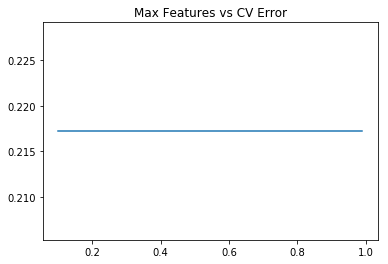

In [81]:
plt.plot(max_features, test_scores)
plt.title('Max Features vs CV Error')

In [82]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight

array([  0.525,  10.5  ])

In [83]:
rfc = RandomForestClassifier(n_estimators=200, max_features=4, oob_score=True)
model = rfc.fit(X_train, y_train)

In [84]:
# 使用 OOB (out of band) 来对模型的精确度进行评估.
rfc.oob_score_

0.95238095238095233

In [85]:
print ("准确率为：{:.2f}".format(rfc.score(X_test,y_test)))

准确率为：0.89


In [86]:
y_pred=model.predict(X_test) 
predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

In [87]:
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(y_test.map(map_dict_recurrence), predictions, 
            rownames=['真实值'], colnames=['预测值'])

预测值,未复发
真实值,
复发,7
未复发,57


# Ensemble
#### 多个classifer分类器组合

# SMOTE 合成少数类过采样技术+ XGBoost
#### Synthetic Minority Oversampling Technique

In [88]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [89]:
# the dataset
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 237, 1: 16})


In [90]:
# Apply the SMOTE over−sampling
sm = SMOTE(random_state=42, ratio='all', k_neighbors=2, m_neighbors=10, kind='regular')
X_train_resampled, y_train_resampled = sm.fit_sample(X_train.values, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_resampled)))

Resampled dataset shape Counter({0: 180, 1: 180})


In [91]:
#训练模型
model = xgboost.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [92]:
# 做预测
y_pred = model.predict(X_test.values)
predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

# 显示准群率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# confusion matrix
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(pd.Series(y_test).map(map_dict_recurrence), predictions, 
            rownames=['真实值'], colnames=['预测值'])

Accuracy: 87.50%


预测值,复发,未复发
真实值,,
复发,0,7
未复发,1,56


# SMOTE 合成少数类过采样技术+ RandomForest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
max_features =  [.1, .3, .5, .7, .9 , .99]
test_scores = []
for max_feat in max_features:
    rfc = RandomForestClassifier(n_estimators=200, max_features=max_feat, oob_score=True)
    test_score = np.sqrt(-cross_val_score(rfc, X_train_resampled, y_train_resampled, cv=5, 
                                          scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

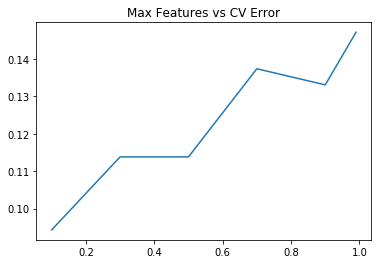

In [95]:
plt.plot(max_features, test_scores)
plt.title('Max Features vs CV Error')

In [96]:
rfc = RandomForestClassifier(n_estimators=200, max_features=6, oob_score=True)
model = rfc.fit(X_train_resampled.astype(uint8), y_train_resampled)

In [97]:
# 使用 OOB (out of band) 来对模型的精确度进行评估.
print('OOB: {:.2f}'.format(rfc.oob_score_))
# 显示 准确率
print ("准确率为：{:.2f}".format(rfc.score(X_test,y_test)))

OOB: 0.97
准确率为：0.89


In [98]:
y_pred=model.predict(X_test) 

predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

# 显示准群率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# confusion matrix
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(pd.Series(y_test).map(map_dict_recurrence),predictions, 
            rownames=['真实值'], colnames=['预测值'])

Accuracy: 89.06%


预测值,未复发
真实值,
复发,7
未复发,57


# SVM 支持向量机

##### 支持向量机有两种
    1 SVC，支持向量分类，用于分类问题；
    2 SVR，支持向量回归，用于回归问题。    

In [99]:
%pylab inline
import pylab as pl
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


In [100]:
svc = svm.SVC(kernel='linear')
model = svc.fit(X_train_resampled, y_train_resampled)

In [101]:
y_pred=model.predict(X_test) 

predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

# 显示准群率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# confusion matrix
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(pd.Series(y_test).map(map_dict_recurrence),predictions, 
            rownames=['真实值'], colnames=['预测值'])

Accuracy: 89.06%


预测值,未复发
真实值,
复发,7
未复发,57


# Logistic 回归

In [102]:
from  sklearn.linear_model import LogisticRegression

In [103]:
# 初始化 Logistic Regression
lr = LogisticRegression()

In [104]:
# 调用LogisticRegression中的fit函数/模块来训练模型参数
model = lr.fit(X_train_resampled, y_train_resampled)

In [105]:
from collections import Counter
Counter(y_train), Counter(y_train_resampled)

(Counter({0: 180, 1: 9}), Counter({0: 180, 1: 180}))

In [106]:
X_train.shape, y_train.shape

((189, 82), (189,))

In [107]:
# 预测
y_pred=model.predict(X_test) 
predictions=y_pred.astype(str)
predictions[predictions=='0']='未复发'
predictions[predictions=='1']='复发'

# 显示准群率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

# confusion matrix
map_dict_recurrence = {0:'未复发', 1:'复发'}
pd.crosstab(pd.Series(y_test).map(map_dict_recurrence),predictions, 
            rownames=['真实值'], colnames=['预测值'])

Accuracy: 89.06%


预测值,未复发
真实值,
复发,7
未复发,57


In [181]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 161 to 102
Data columns (total 82 columns):
Group_个体化组             189 non-null uint8
Group_对照组              189 non-null uint8
Group_长程组              189 non-null uint8
Group_高剂量组             189 non-null uint8
文化程度_Unknown           189 non-null uint8
文化程度_中学                189 non-null uint8
文化程度_大专本科以上            189 non-null uint8
文化程度_小学及以下             189 non-null uint8
职业_企业职工                189 non-null uint8
职业_其它                  189 non-null uint8
职业_农民                  189 non-null uint8
职业_商业服务人员              189 non-null uint8
职业_外来务工人员              189 non-null uint8
职业_待业下岗人员              189 non-null uint8
婚姻状况_Unknown           189 non-null uint8
婚姻状况_已婚                189 non-null uint8
婚姻状况_未婚                189 non-null uint8
户籍类型_本地户籍              189 non-null uint8
户籍类型_非本地一年以上           189 non-null uint8
户籍类型_非本地一年内            189 non-null uint8
家庭人口数_0.0              189 non-null uint8
家庭人口数_1.0  

# 神经网络

 ## BP 神经网络

In [110]:
from sklearn.datasets import make_moons

In [111]:
np.random.seed(0)

In [137]:
X, y = make_moons(200, noise=0.2)

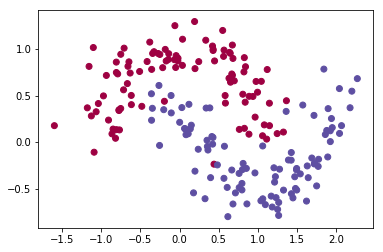

In [138]:
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Spectral)
# Marker size is scaled by `s` and marker color is mapped to `c`
plt.show()

In [142]:
# 定义一个函数用来画我们分类结果的决策边界（也就是分界线）

def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h=0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #然后画图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral)

In [146]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

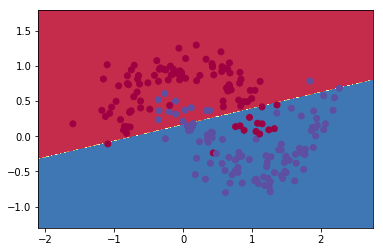

In [149]:
plot_decision_boundary(lambda x:clf.predict(x))